In [1]:
#%%
#* Import the code needed
import os
from pathlib import Path
import numpy as np
import sys
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#%%
#* Define paths
directory_path = Path('../../')

In [28]:
pop = pd.read_excel(
    directory_path / 'data' / 'regression_data' / 'Population' / 'regression_Population.xlsx',
    index_col=0)

PpD = pd.read_excel(
    directory_path / 'data' / 'regression_data' / 'PpD' / 'regression_PpD.xlsx',
    index_col=0)

UFApD = pd.read_excel(
    directory_path / 'data' / 'regression_data' / 'UFApD' / 'regression_UFApD.xlsx',
    index_col=0)

energy_intensity = pd.read_excel(
    directory_path / 'data' / 'cleaned_and_combined_data' / 'Energy_Intensity' / 'Energy_intensity_constants.xlsx',
    index_col=[0,1,2])

TS_cj = pd.read_excel(
    directory_path / 'data' / 'cleaned_and_combined_data' / 'Type_Split' / 'Type_Split_ratios.xlsx',
    index_col=0)

lifetime = pd.read_excel(
    directory_path / 'data' / 'regression_data' / 'Dwelling_Lifetime' / 'lifetime_regression.xlsx',
    index_col=0)

lifetime_standard_deviation = pd.read_excel(
    directory_path / 'data' / 'regression_data' / 'Dwelling_Lifetime' / 'lifetime_regression.xlsx',
    index_col=0)

lifetime = lifetime.drop('std_dev', axis=1)
lifetime_standard_deviation = lifetime_standard_deviation.drop('lifetime', axis=1)

lifetime = lifetime.loc[:, 'lifetime'].to_numpy()
lifetime

lifetime_standard_deviation = lifetime_standard_deviation.loc[:, 'std_dev'].to_numpy()

In [4]:
# getting the name of the directory where the this file is present.
current = os.path.dirname(os.path.realpath('this'))
 
# Getting the parent directory name where the current directory is present.
parent = os.path.dirname(current)
#make the UA path
module_path = parent + '/modules'
#append path to options to import from
sys.path.append(module_path)

from dynamic_stock_model import DynamicStockModel

In [5]:
stock_t = np.multiply(pop,PpD)

stock_t_SFH = np.multiply(stock_t,TS_cj['SFH_ratio'])
stock_t_TH = np.multiply(stock_t,TS_cj['TH_ratio'])
stock_t_AB = np.multiply(stock_t,TS_cj['AB_ratio'])

C:\Users\grace\AppData\Local\Temp\ipykernel_30404\669566578.py:1: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  stock_t = np.multiply(pop,PpD)
C:\Users\grace\AppData\Local\Temp\ipykernel_30404\669566578.py:3: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array 

In [8]:
def stock_model(stock):
    dwellings_stock_driven = DynamicStockModel(t=np.arange(1600, 2051),
                         s=stock_t_SFH['Population'].to_numpy(),
                         lt={'Type': 'Normal', 
                             'Mean': lifetime,
                             'StdDev': lifetime_standard_deviation 
                             }
                        )
    
    dwellings_stock_driven.compute_stock_driven_model(
        NegativeInflowCorrect = True)
    
    inflow_t = dwellings_stock_driven.i

    dwellings_inflow_driven = DynamicStockModel(t=np.arange(1600, 2051),
                    i=inflow_t,
                    lt={'Type': 'Normal', 
                        'Mean': lifetime,
                        'StdDev': lifetime_standard_deviation 
                        }
                    )
    dwellings_inflow_driven.compute_s_c_inflow_driven()

    dwellings_inflow_driven.compute_stock_total()

    dwellings_inflow_driven.compute_o_c_from_s_c()


    return dwellings_inflow_driven.s_c, dwellings_inflow_driven.s, dwellings_stock_driven.i, dwellings_stock_driven.o_c


In [9]:
s_c_SFH, s_SFH, i_SFH, o_SFH = stock_model(stock_t_SFH)
s_c_TH, s_TH, i_TH, o_TH = stock_model(stock_t_TH)
s_c_AB, s_AB, i_AB, o_AB = stock_model(stock_t_AB)

Text(0, 0.5, 'dwellings')

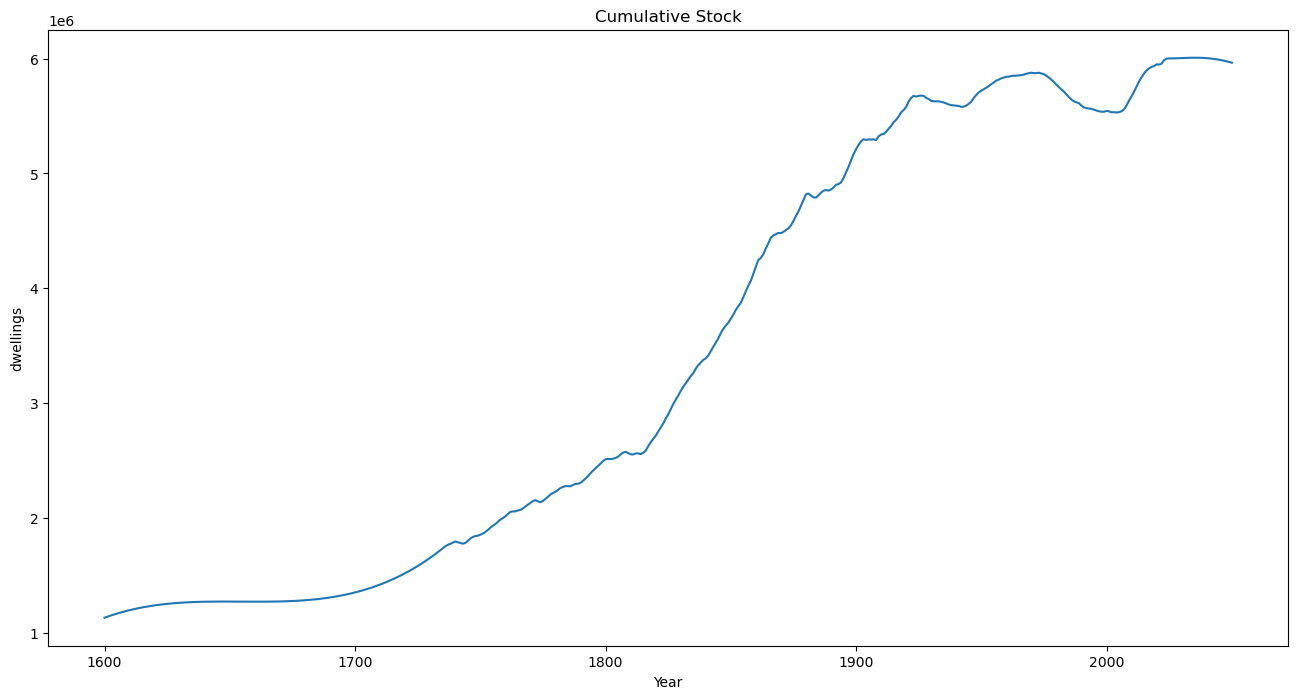

In [8]:
# Plot SFH total stock
plt.figure(figsize=(16, 8))
plt.plot(np.arange(1600, 2051), s_SFH)
plt.title('Cumulative Stock')
plt.xlabel('Year')
plt.ylabel('dwellings')

Text(0, 0.5, 'dwellings')

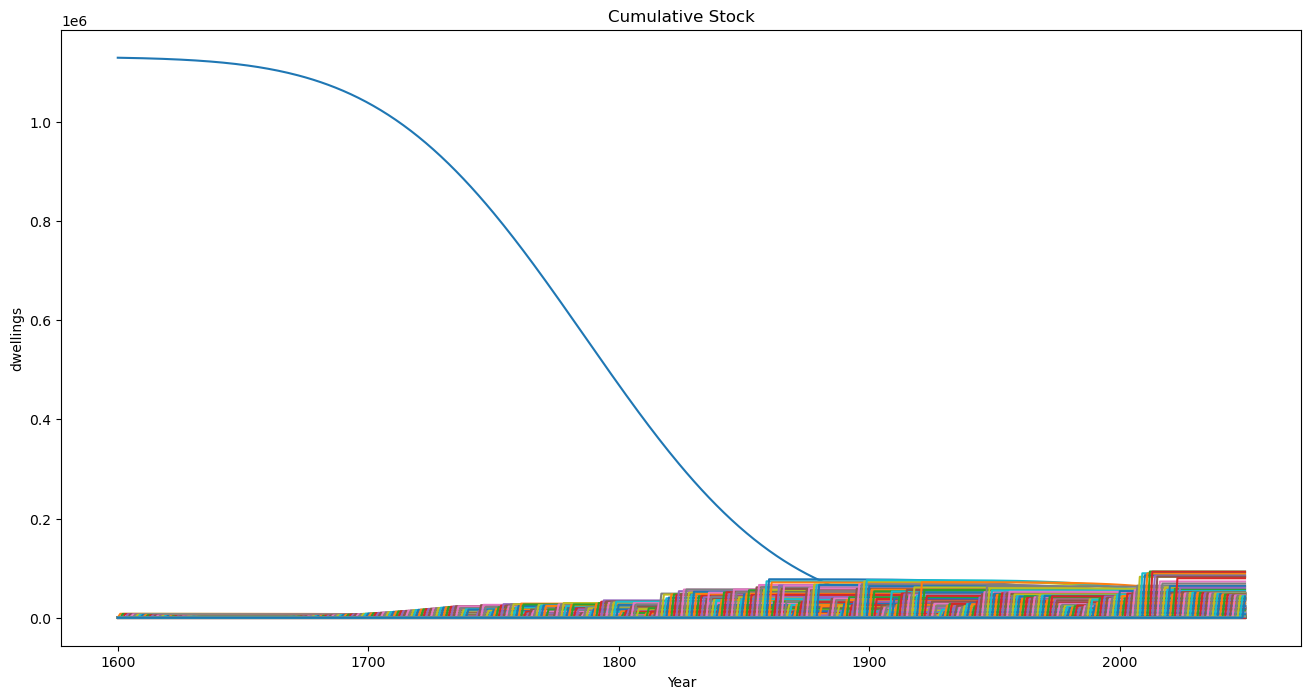

In [9]:
# Plot SFH stock by cohort
plt.figure(figsize=(16, 8))
plt.plot(np.arange(1600, 2051), s_c_SFH)
plt.title('Cumulative Stock')
plt.xlabel('Year')
plt.ylabel('dwellings')

Text(0, 0.5, 'dwellings')

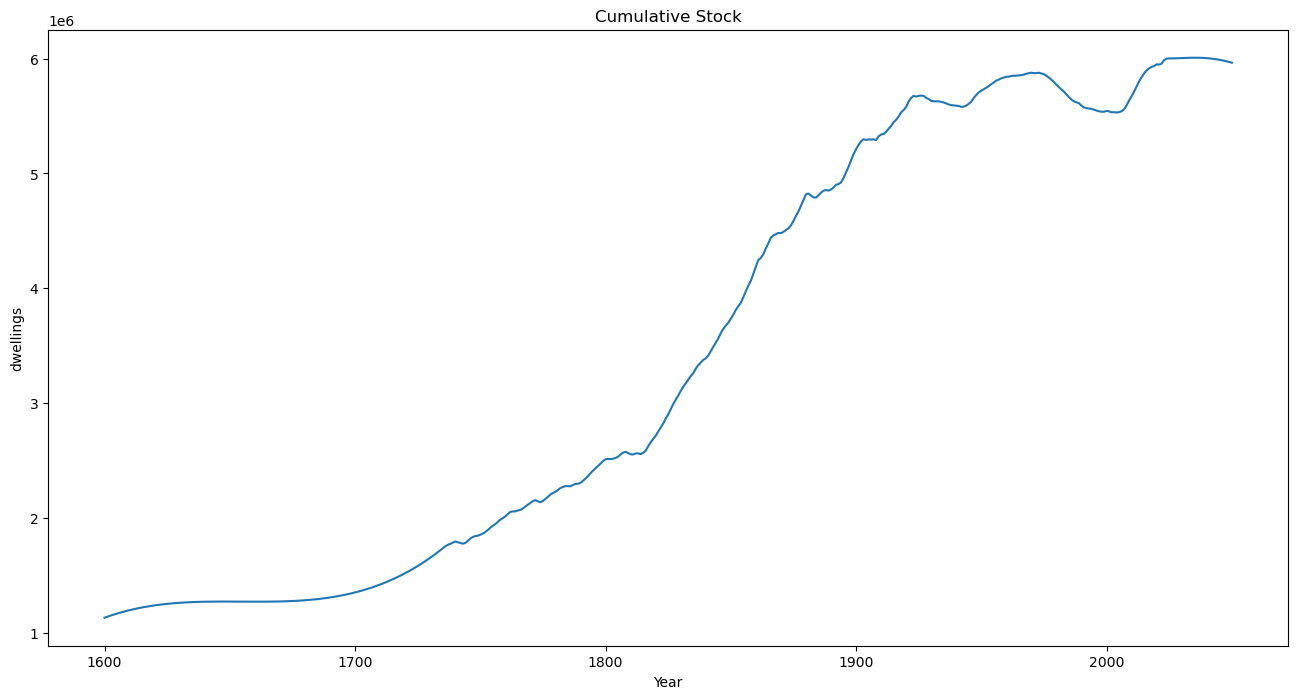

In [10]:
# Plot TH total stock
plt.figure(figsize=(16, 8))
plt.plot(np.arange(1600, 2051), s_TH)
plt.title('Cumulative Stock')
plt.xlabel('Year')
plt.ylabel('dwellings')

Text(0, 0.5, 'dwellings')

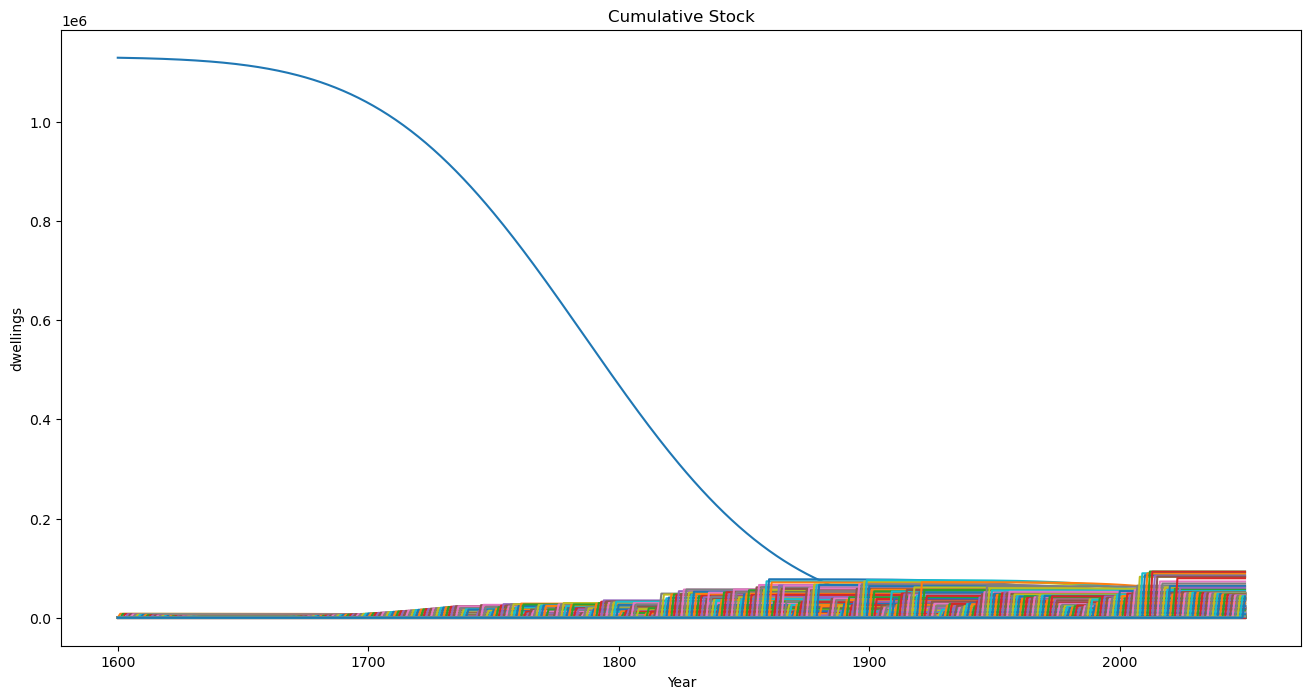

In [11]:
# Plot TH stock by cohort
plt.figure(figsize=(16, 8))
plt.plot(np.arange(1600, 2051), s_c_TH)
plt.title('Cumulative Stock')
plt.xlabel('Year')
plt.ylabel('dwellings')

Text(0, 0.5, 'dwellings')

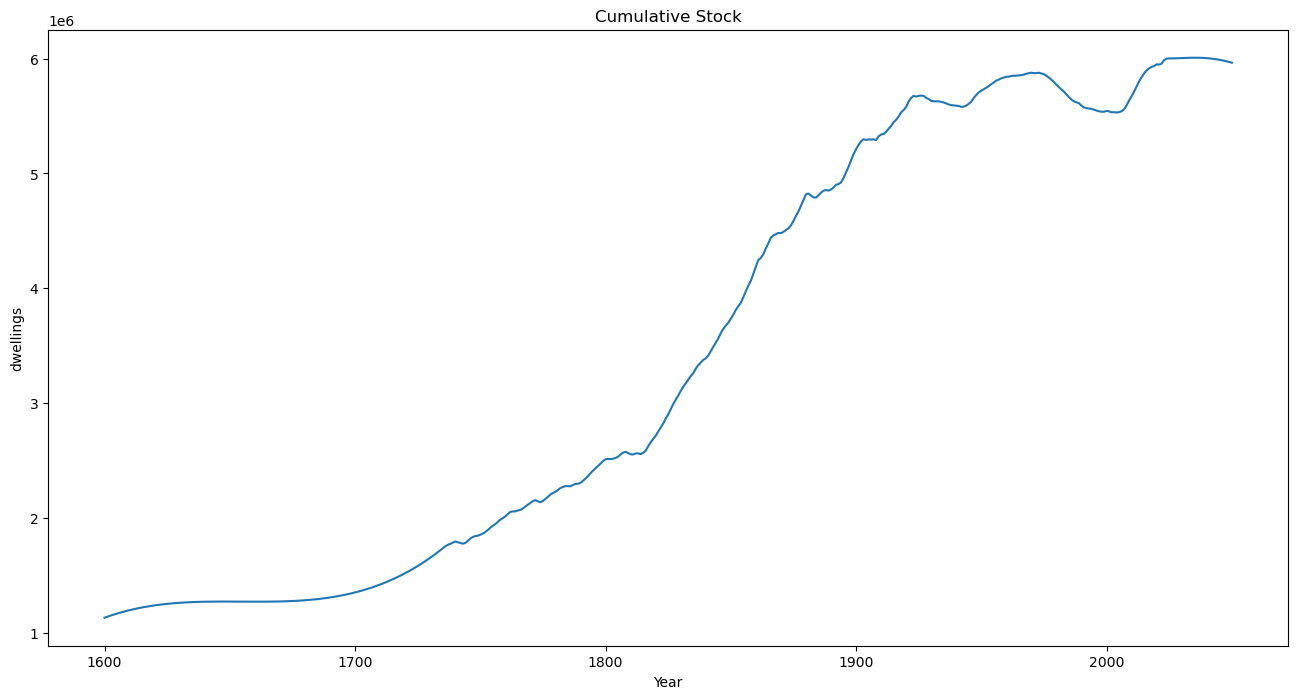

In [12]:
# Plot AB total stock
plt.figure(figsize=(16, 8))
plt.plot(np.arange(1600, 2051), s_AB)
plt.title('Cumulative Stock')
plt.xlabel('Year')
plt.ylabel('dwellings')

Text(0, 0.5, 'dwellings')

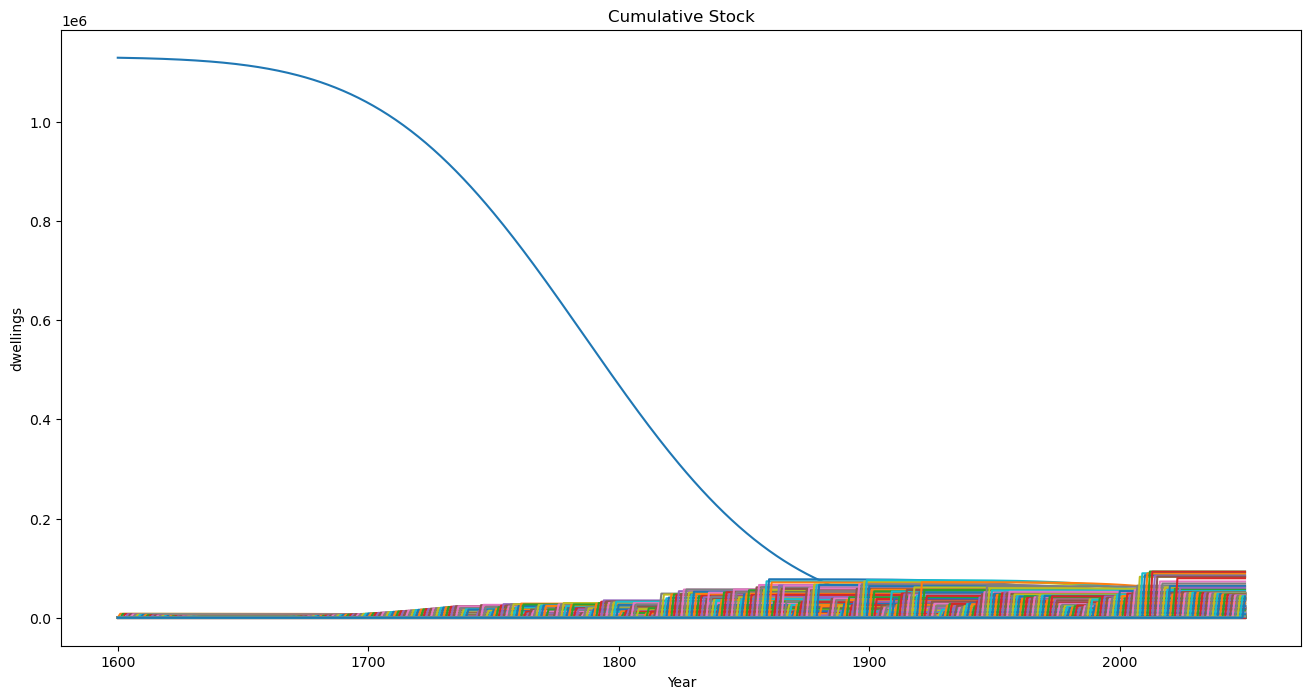

In [13]:
# Plot AB stock by cohort
plt.figure(figsize=(16, 8))
plt.plot(np.arange(1600, 2051), s_c_AB)
plt.title('Cumulative Stock')
plt.xlabel('Year')
plt.ylabel('dwellings')

In [10]:
s_total = s_SFH + s_TH + s_AB

s_c_total = s_c_SFH + s_c_TH + s_c_AB

stock_change_SFH = i_SFH - o_SFH
stock_change_TH = i_TH - o_TH
stock_change_AB = i_AB - o_AB

stock_change_total = stock_change_SFH + stock_change_TH + stock_change_AB

i_total = i_SFH + i_TH + i_AB

o_total = o_SFH + o_TH + o_AB

Text(0, 0.5, 'dwellings')

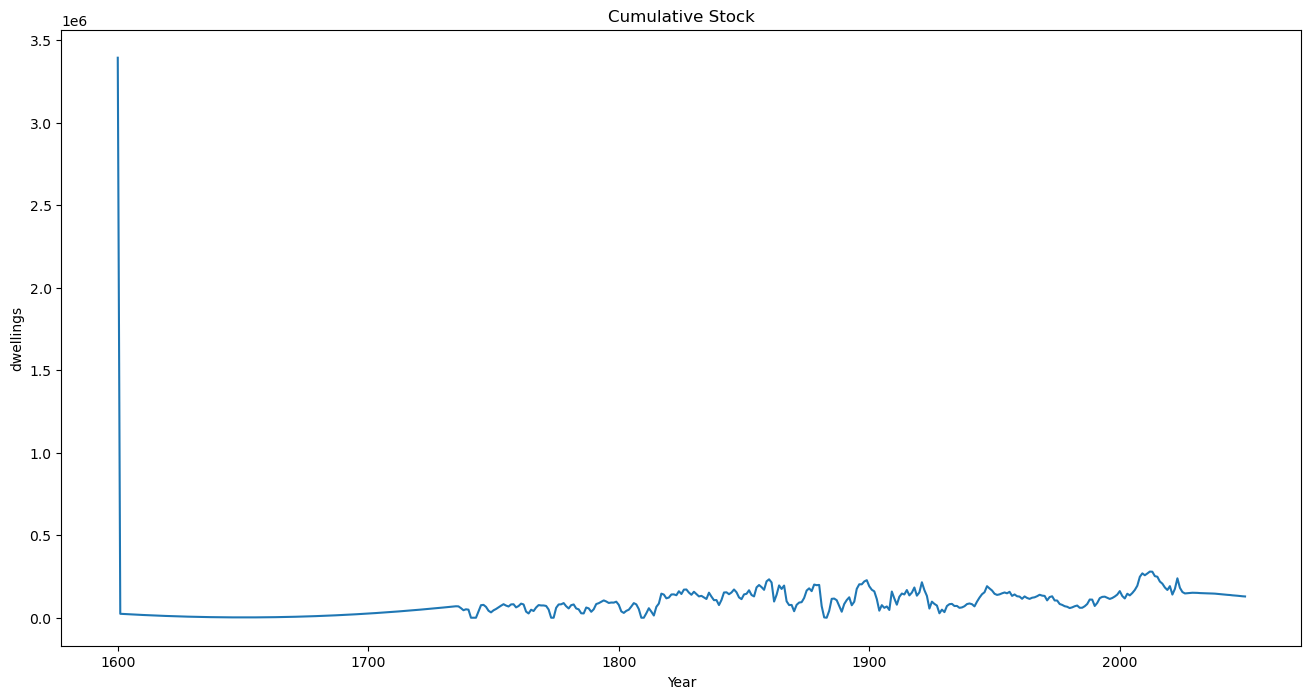

In [15]:
# Plot total inflow
plt.figure(figsize=(16, 8))
plt.plot(np.arange(1600, 2051), i_total)
plt.title('Cumulative Stock')
plt.xlabel('Year')
plt.ylabel('dwellings')

Text(0, 0.5, 'dwellings')

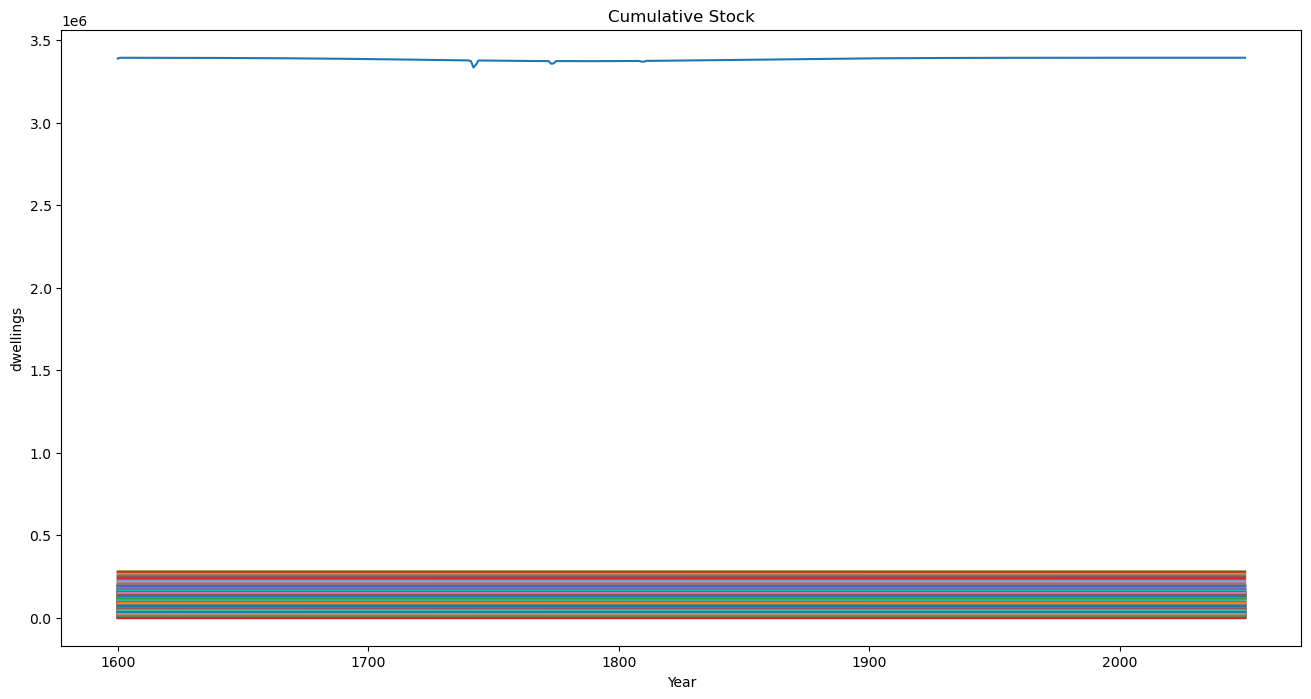

In [17]:
# Plot total stock change
plt.figure(figsize=(16, 8))
plt.plot(np.arange(1600, 2051), stock_change_total)
plt.title('Cumulative Stock')
plt.xlabel('Year')
plt.ylabel('dwellings')

Text(0, 0.5, 'dwellings')

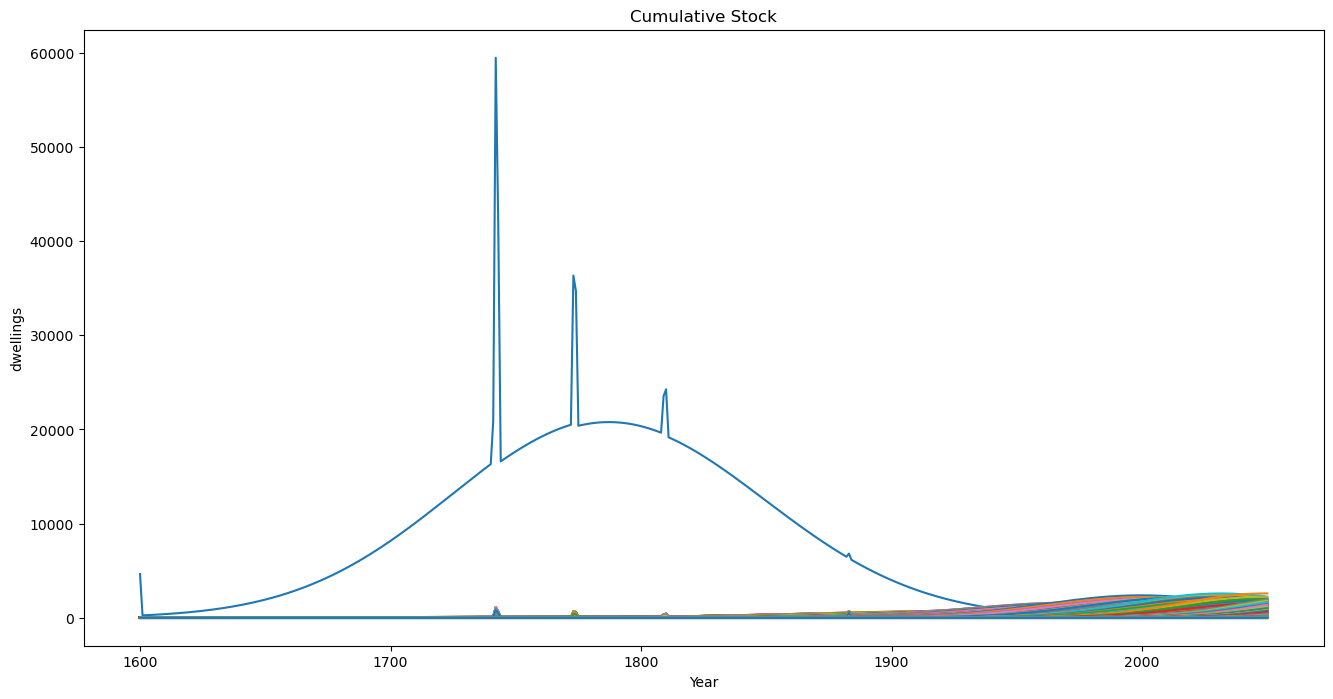

In [18]:
# Plot total outflow
plt.figure(figsize=(16, 8))
plt.plot(np.arange(1600, 2051), o_total)
plt.title('Cumulative Stock')
plt.xlabel('Year')
plt.ylabel('dwellings')

Text(0, 0.5, 'dwellings')

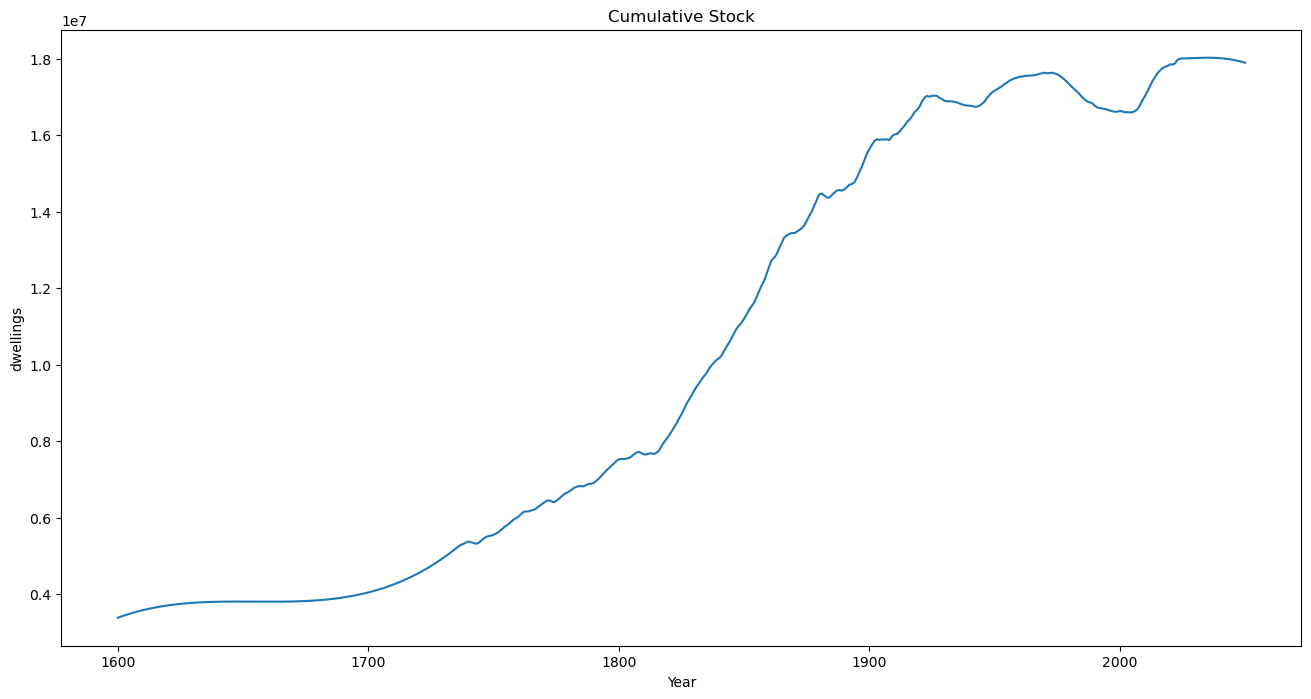

In [11]:
# Plot total stock
plt.figure(figsize=(16, 8))
plt.plot(np.arange(1600, 2051), s_total)
plt.title('Cumulative Stock')
plt.xlabel('Year')
plt.ylabel('dwellings')

Text(0, 0.5, 'dwellings')

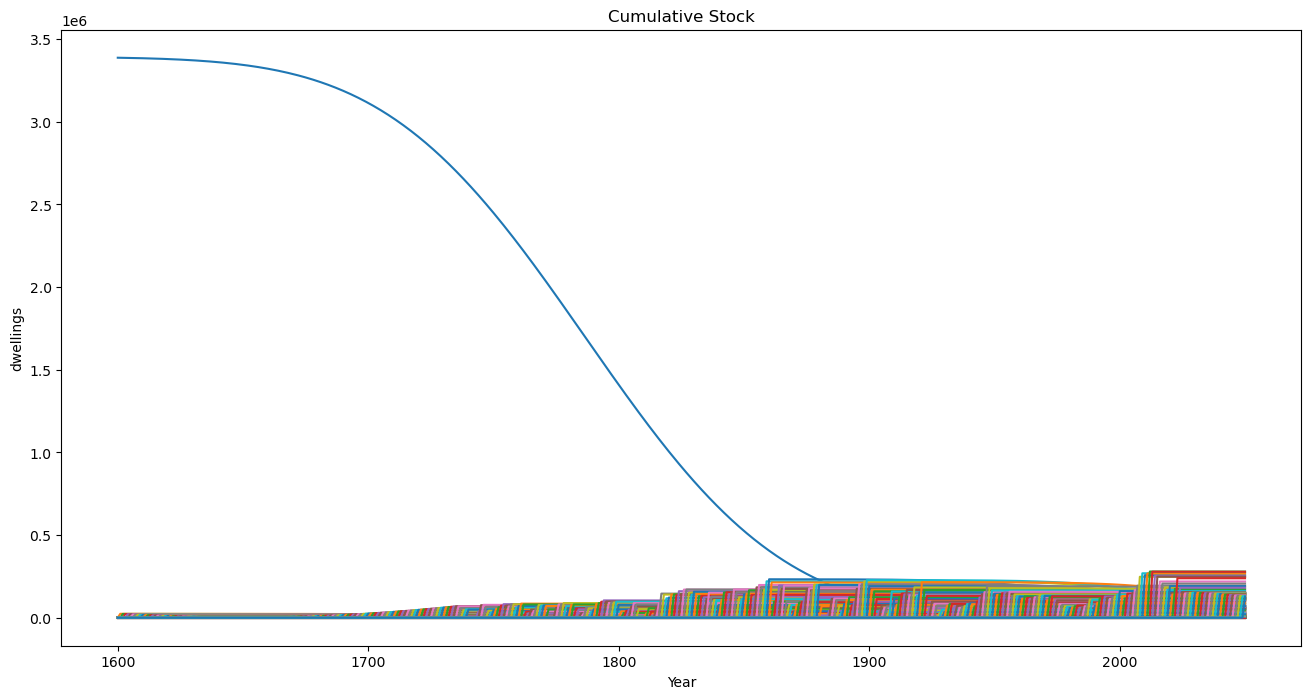

In [16]:
# Plot total stock by cohort
plt.figure(figsize=(16, 8))
plt.plot(np.arange(1600, 2051), s_c_total)
plt.title('Cumulative Stock')
plt.xlabel('Year')
plt.ylabel('dwellings')

In [ ]:
# Plot stock change
plt.figure(figsize=(16, 8))
plt.plot(np.arange(1600, 2051), stock_change_total)
plt.title('Cumulative Stock')
plt.xlabel('Year')
plt.ylabel('dwellings')

In [ ]:
# Plot total inflow
plt.figure(figsize=(16, 8))
plt.plot(np.arange(1600, 2051), i_total)
plt.title('Cumulative Stock')
plt.xlabel('Year')
plt.ylabel('dwellings')

In [ ]:
# Plot total outlfow
plt.figure(figsize=(16, 8))
plt.plot(np.arange(1600, 2051), o_total)
plt.title('Cumulative Stock')
plt.xlabel('Year')
plt.ylabel('dwellings')

In [30]:
UFApD.drop_duplicates(inplace=True)

,UFApD SFH,UFApD TH,UFApD AB
Year,,,
1600,330.682806,123.200138,83.454020
1601,330.342699,123.154271,83.429952
1602,330.002593,123.108404,83.405885
1603,329.662486,123.062537,83.381817
1604,329.322380,123.016670,83.357749
...,...,...,...
2046,178.995294,102.743441,72.719753
2047,178.655187,102.697573,72.695685
2048,178.315080,102.651706,72.671617


In [38]:
UFApD

,UFApD SFH,UFApD TH,UFApD AB
Year,,,
1600,330.682806,123.200138,83.454020
1601,330.342699,123.154271,83.429952
1602,330.002593,123.108404,83.405885
1603,329.662486,123.062537,83.381817
1604,329.322380,123.016670,83.357749
...,...,...,...
2046,178.995294,102.743441,72.719753
2047,178.655187,102.697573,72.695685
2048,178.315080,102.651706,72.671617


In [65]:
s_c_SFH_df = pd.DataFrame(s_c_SFH)
s_c_SFH_df = s_c_SFH_df.set_index(UFApD.index)
s_c_SFH_df.columns = np.arange(1600, 2051)
s_c_SFH_df

,1600,1601,1602,1603,1604,1605,1606,1607,1608,1609,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
Year,,,,,,,,,,,,,,,,,,,,,
1600,1.129272e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1601,1.129188e+06,7932.320398,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1602,1.129101e+06,7931.735745,7643.776372,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1603,1.129009e+06,7931.122400,7643.214586,7360.902334,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1604,1.128913e+06,7930.479121,7642.625175,7360.362880,7083.705294,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,1.784240e+01,0.129228,0.128495,0.127688,0.126717,0.125758,0.124723,0.123522,0.122330,0.121059,...,47134.417965,46714.638116,46194.457057,45838.148643,45220.307961,44859.675760,0.000000,0.000000,0.000000,0.000000
2047,1.662916e+01,0.120441,0.119759,0.119008,0.118104,0.117212,0.116248,0.115129,0.114020,0.112836,...,47134.345134,46714.579330,46194.410349,45838.111250,45220.278502,44859.652364,44368.946491,0.000000,0.000000,0.000000
2048,1.549459e+01,0.112224,0.111590,0.110891,0.110049,0.109218,0.108321,0.107280,0.106247,0.105145,...,47134.257521,46714.508428,46194.353854,45838.065899,45220.242670,44859.623828,44368.924116,43735.068484,0.000000,0.000000


In [66]:
s_UFA_c_SFH = s_c_SFH_df @ np.diag(UFApD['UFApD SFH'])
s_UFA_c_SFH = pd.DataFrame(s_UFA_c_SFH)
s_UFA_c_SFH.columns = np.arange(1600, 2051)

s_UFA_c_TH = s_c_TH_df @ np.diag(UFApD['UFApD TH'])
s_UFA_c_TH = pd.DataFrame(s_UFA_c_TH)
s_UFA_c_TH.columns = np.arange(1600, 2051)

s_UFA_c_AB = s_c_AB_df @ np.diag(UFApD['UFApD AB'])
s_UFA_c_AB = pd.DataFrame(s_UFA_c_AB)
s_UFA_c_AB.columns = np.arange(1600, 2051)

,1600,1601,1602,1603,1604,1605,1606,1607,1608,1609,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
Year,,,,,,,,,,,,,,,,,,,,,
1600,3.734307e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1601,3.734031e+08,2.620384e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1602,3.733742e+08,2.620191e+06,2.522466e+06,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1603,3.733439e+08,2.619988e+06,2.522281e+06,2.426613e+06,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1604,3.733120e+08,2.619776e+06,2.522086e+06,2.426436e+06,2.332823e+06,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,5.900176e+03,4.268938e+01,4.240364e+01,4.209393e+01,4.173062e+01,41.372306,40.989197,40.552640,40.119729,39.661616,...,8.516993e+06,8.425252e+06,8.315724e+06,8.235993e+06,8.109602e+06,8.029671e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2047,5.498976e+03,3.978681e+01,3.952083e+01,3.923251e+01,3.889415e+01,38.560549,38.203845,37.797236,37.394125,36.967529,...,8.516979e+06,8.425242e+06,8.315715e+06,8.235986e+06,8.109597e+06,8.029667e+06,7.926742e+06,0.000000e+00,0.000000e+00,0.000000e+00
2048,5.123795e+03,3.707244e+01,3.682488e+01,3.655653e+01,3.624145e+01,35.930911,35.598850,35.220204,34.844912,34.447740,...,8.516964e+06,8.425229e+06,8.315705e+06,8.235978e+06,8.109590e+06,8.029662e+06,7.926738e+06,7.798622e+06,0.000000e+00,0.000000e+00


In [105]:
def energy_use_calculation_SFH(stock_c_UFA):
    energy_use_matrix = pd.DataFrame()
    for year in stock_c_UFA.columns:
        if int(year) <= 1955:
            iteration = pd.DataFrame(np.multiply(s_UFA_c_SFH.loc[:, year],energy_intensity.loc[('pre 1955' , 'SFH', 'OG'),'Energy intensity  (kWh/m2a)']))
            energy_use_matrix = pd.concat([energy_use_matrix, iteration], axis=1)
        elif int(year) >= 1956 and int(year) <= 1970:
            iteration = pd.DataFrame(np.multiply(s_UFA_c_SFH.loc[:, year],energy_intensity.loc[('1956-70' , 'SFH', 'OG'),'Energy intensity  (kWh/m2a)']))
            energy_use_matrix = pd.concat([energy_use_matrix, iteration], axis=1)
        elif int(year) >= 1971 and int(year) <= 1980:
            iteration = pd.DataFrame(np.multiply(s_UFA_c_SFH.loc[:, year],energy_intensity.loc[('1971-80' , 'SFH', 'OG'),'Energy intensity  (kWh/m2a)']))
            energy_use_matrix = pd.concat([energy_use_matrix, iteration], axis=1)
        elif int(year) >= 1981 and int(year) <= 1990:
            iteration = pd.DataFrame(np.multiply(s_UFA_c_SFH.loc[:, year],energy_intensity.loc[('1981-90' , 'SFH', 'OG'),'Energy intensity  (kWh/m2a)']))
            energy_use_matrix = pd.concat([energy_use_matrix, iteration], axis=1)
        elif int(year) >= 1991 and int(year) <= 2000:
            iteration = pd.DataFrame(np.multiply(s_UFA_c_SFH.loc[:, year],energy_intensity.loc[('1991-2000' , 'SFH', 'OG'),'Energy intensity  (kWh/m2a)']))
            energy_use_matrix = pd.concat([energy_use_matrix, iteration], axis=1)
        elif int(year) >= 2001 and int(year) <= 2010:
            iteration = pd.DataFrame(np.multiply(s_UFA_c_SFH.loc[:, year],energy_intensity.loc[('2001-2010' , 'SFH', 'OG'),'Energy intensity  (kWh/m2a)']))
            energy_use_matrix = pd.concat([energy_use_matrix, iteration], axis=1)
        elif int(year) >= 2011:
            iteration = pd.DataFrame(np.multiply(s_UFA_c_SFH.loc[:, year],energy_intensity.loc[('2011-' , 'SFH', 'OG'),'Energy intensity  (kWh/m2a)']))
            energy_use_matrix = pd.concat([energy_use_matrix, iteration], axis=1)
    return energy_use_matrix

In [106]:
energy_use_matrix_SFH = energy_use_calculation_SFH(s_UFA_c_SFH)
energy_use_matrix_SFH

,1600,1601,1602,1603,1604,1605,1606,1607,1608,1609,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
Year,,,,,,,,,,,,,,,,,,,,,
1600,8.514221e+10,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1601,8.513592e+10,5.974476e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1602,8.512932e+10,5.974035e+08,5.751223e+08,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1603,8.512240e+10,5.973574e+08,5.750800e+08,5.532678e+08,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1604,8.511514e+10,5.973089e+08,5.750356e+08,5.532273e+08,5.318836e+08,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,1.345240e+06,9.733178e+03,9.668031e+03,9.597417e+03,9.514582e+03,9432.885749,9345.536943,9246.001929,9147.298198,9042.848481,...,7.154274e+08,7.077212e+08,6.985208e+08,6.918234e+08,6.812066e+08,6.744923e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2047,1.253767e+06,9.071392e+03,9.010750e+03,8.945013e+03,8.867867e+03,8791.805274,8710.476765,8617.769768,8525.860481,8428.596546,...,7.154263e+08,7.077203e+08,6.985201e+08,6.918228e+08,6.812061e+08,6.744920e+08,6.658464e+08,0.000000e+00,0.000000e+00,0.000000e+00
2048,1.168225e+06,8.452515e+03,8.396074e+03,8.334888e+03,8.263052e+03,8192.247677,8116.537868,8030.206534,7944.639974,7854.084812,...,7.154249e+08,7.077192e+08,6.985192e+08,6.918221e+08,6.812056e+08,6.744916e+08,6.658460e+08,6.550843e+08,0.000000e+00,0.000000e+00


In [108]:
energy_use_vector_SFH = energy_use_matrix_SFH.sum(axis=1)
energy_use_vector_SFH

Year
1600    8.514221e+10
1601    8.573336e+10
1602    8.630184e+10
1603    8.684810e+10
1604    8.737260e+10
            ...     
2046    1.970484e+11
2047    1.952001e+11
2048    1.933481e+11
2049    1.914957e+11
2050    1.896439e+11
Length: 451, dtype: float64

In [ ]:

#* Copy and paste the above 3 blocks of code, change all instances of SFH to TH

In [ ]:
def energy_use_calculation_TH(stock_c_UFA):
    energy_use_matrix = pd.DataFrame()
    for year in stock_c_UFA.columns:
        if int(year) <= 1955:
            iteration = pd.DataFrame(np.multiply(s_UFA_c_TH.loc[:, year],energy_intensity.loc[('pre 1955' , 'TH', 'OG'),'Energy intensity  (kWh/m2a)']))
            energy_use_matrix = pd.concat([energy_use_matrix, iteration], axis=1)
        elif int(year) >= 1956 and int(year) <= 1970:
            iteration = pd.DataFrame(np.multiply(s_UFA_c_TH.loc[:, year],energy_intensity.loc[('1956-70' , 'TH', 'OG'),'Energy intensity  (kWh/m2a)']))
            energy_use_matrix = pd.concat([energy_use_matrix, iteration], axis=1)
        elif int(year) >= 1971 and int(year) <= 1980:
            iteration = pd.DataFrame(np.multiply(s_UFA_c_TH.loc[:, year],energy_intensity.loc[('1971-80' , 'TH', 'OG'),'Energy intensity  (kWh/m2a)']))
            energy_use_matrix = pd.concat([energy_use_matrix, iteration], axis=1)
        elif int(year) >= 1981 and int(year) <= 1990:
            iteration = pd.DataFrame(np.multiply(s_UFA_c_TH.loc[:, year],energy_intensity.loc[('1981-90' , 'TH', 'OG'),'Energy intensity  (kWh/m2a)']))
            energy_use_matrix = pd.concat([energy_use_matrix, iteration], axis=1)
        elif int(year) >= 1991 and int(year) <= 2000:
            iteration = pd.DataFrame(np.multiply(s_UFA_c_TH.loc[:, year],energy_intensity.loc[('1991-2000' , 'TH', 'OG'),'Energy intensity  (kWh/m2a)']))
            energy_use_matrix = pd.concat([energy_use_matrix, iteration], axis=1)
        elif int(year) >= 2001 and int(year) <= 2010:
            iteration = pd.DataFrame(np.multiply(s_UFA_c_TH.loc[:, year],energy_intensity.loc[('2001-2010' , 'TH', 'OG'),'Energy intensity  (kWh/m2a)']))
            energy_use_matrix = pd.concat([energy_use_matrix, iteration], axis=1)
        elif int(year) >= 2011:
            iteration = pd.DataFrame(np.multiply(s_UFA_c_TH.loc[:, year],energy_intensity.loc[('2011-' , 'TH', 'OG'),'Energy intensity  (kWh/m2a)']))
            energy_use_matrix = pd.concat([energy_use_matrix, iteration], axis=1)
    return energy_use_matrix

In [ ]:
energy_use_matrix_TH = energy_use_calculation_TH(s_UFA_c_TH)
energy_use_matrix_TH

In [ ]:
energy_use_vector_TH = energy_use_matrix_TH.sum(axis=1)
energy_use_vector_TH

In [ ]:

#* Copy and paste the above 3 blocks of code, change all instances of TH to AB

In [ ]:
def energy_use_calculation_AB(stock_c_UFA):
    energy_use_matrix = pd.DataFrame()
    for year in stock_c_UFA.columns:
        if int(year) <= 1955:
            iteration = pd.DataFrame(np.multiply(s_UFA_c_AB.loc[:, year],energy_intensity.loc[('pre 1955' , 'AB', 'OG'),'Energy intensity  (kWh/m2a)']))
            energy_use_matrix = pd.concat([energy_use_matrix, iteration], axis=1)
        elif int(year) >= 1956 and int(year) <= 1970:
            iteration = pd.DataFrame(np.multiply(s_UFA_c_AB.loc[:, year],energy_intensity.loc[('1956-70' , 'AB', 'OG'),'Energy intensity  (kWh/m2a)']))
            energy_use_matrix = pd.concat([energy_use_matrix, iteration], axis=1)
        elif int(year) >= 1971 and int(year) <= 1980:
            iteration = pd.DataFrame(np.multiply(s_UFA_c_AB.loc[:, year],energy_intensity.loc[('1971-80' , 'AB', 'OG'),'Energy intensity  (kWh/m2a)']))
            energy_use_matrix = pd.concat([energy_use_matrix, iteration], axis=1)
        elif int(year) >= 1981 and int(year) <= 1990:
            iteration = pd.DataFrame(np.multiply(s_UFA_c_AB.loc[:, year],energy_intensity.loc[('1981-90' , 'AB', 'OG'),'Energy intensity  (kWh/m2a)']))
            energy_use_matrix = pd.concat([energy_use_matrix, iteration], axis=1)
        elif int(year) >= 1991 and int(year) <= 2000:
            iteration = pd.DataFrame(np.multiply(s_UFA_c_AB.loc[:, year],energy_intensity.loc[('1991-2000' , 'AB', 'OG'),'Energy intensity  (kWh/m2a)']))
            energy_use_matrix = pd.concat([energy_use_matrix, iteration], axis=1)
        elif int(year) >= 2001 and int(year) <= 2010:
            iteration = pd.DataFrame(np.multiply(s_UFA_c_AB.loc[:, year],energy_intensity.loc[('2001-2010' , 'AB', 'OG'),'Energy intensity  (kWh/m2a)']))
            energy_use_matrix = pd.concat([energy_use_matrix, iteration], axis=1)
        elif int(year) >= 2011:
            iteration = pd.DataFrame(np.multiply(s_UFA_c_AB.loc[:, year],energy_intensity.loc[('2011-' , 'AB', 'OG'),'Energy intensity  (kWh/m2a)']))
            energy_use_matrix = pd.concat([energy_use_matrix, iteration], axis=1)
    return energy_use_matrix

In [ ]:
energy_use_matrix_AB = energy_use_calculation_AB(s_UFA_c_AB)
energy_use_matrix_AB

In [ ]:
energy_use_vector_AB = energy_use_matrix_AB.sum(axis=1)
energy_use_vector_AB

# 3D PLOT STOCK OVER TIME BY TYPE AND COHORT

# 3D PLOT INFLOW OVER TIME BY TYPE AND COHORT

# 3D PLOT ENERGY USE OVER TIME BY TYPE AND COHORT